In [3]:
import oracledb
import pandas as pd
import psycopg2 as ps
import os
from tabulate import tabulate

db_username = 'admin'  # Add your username
db_password = '12345678'  # Add your password
db_endpoint = 'doggybase.pacodogshop.com'
db_sid = 'ORACLEDB'
db_port = '1521'
db_encoding = 'UTF-8'
db_dsn = f'{db_username}/{db_password}@{db_endpoint}:{db_port}/{db_sid}'

def query_rds(message):
    conn = oracledb.connect(dsn=db_dsn, encoding=db_encoding)

    try:
        cursor = conn.cursor()
        cursor.execute(message)
        
        # Fetch up to 30 rows
        result = cursor.fetchmany(30) 

        # Convert result to list of lists for all columns
        result_list = [list(row) for row in result]

        # Get column names
        column_names = [desc[0] for desc in cursor.description]

        # Tabulate the results and return as a string
        table_string = tabulate(result_list, headers=column_names, tablefmt="grid")
        return table_string

    except oracledb.DatabaseError as e:
        return str(e)  # We'll want to provide context to the error code instead of just the error code.

# Example usage
# message = "SELECT * FROM Customers"  # Replace with your query
# print(query_rds(message))


# Lab2 - Advanced SQL Statements: Joining Data

### Session Objectives:
- Access and Manipulate the data from a single server
- Access and Join the Data from two or more tables.

## Part 1: Reviewing the basic SQL Commands

In this section, we will review the basic structure of SQL queries and the various statements and clauses that comprise them.

### Basic Statements & Clauses in an SQL Query

An SQL query consists of several components that allow you to retrieve and manipulate data from a database table. Let's break down the appearance of an SQL query:

```sql
SELECT *          -- Select all columns from all tables of interest
FROM student      -- Specify the table to get data from (for the SELECT statement)
WHERE student.student_age > 19  -- Filter records based on a condition
GROUP BY student  -- Categorize results, giving a summarized view
HAVING            -- Filter for groups
ORDER BY          -- Sort results by specified criteria
;                 -- Finish queries with a semicolon (may vary depending on DBMS)


##### Note: The WHERE statement filters the rows of data you are interested in, and the HAVING statement filters which groups you want are interested in.

## Query Execution Order

It's essential to understand how the database management system (DBMS) processes SQL queries. The order of execution is as follows:

1. Get data from tables specified in the FROM statement.
2. Filter rows based on criteria in the WHERE clause.
3. If using GROUP BY, create groups and filter using the HAVING clause.
4. Select columns of interest.
5. Sort rows based on criteria specified in ORDER BY.

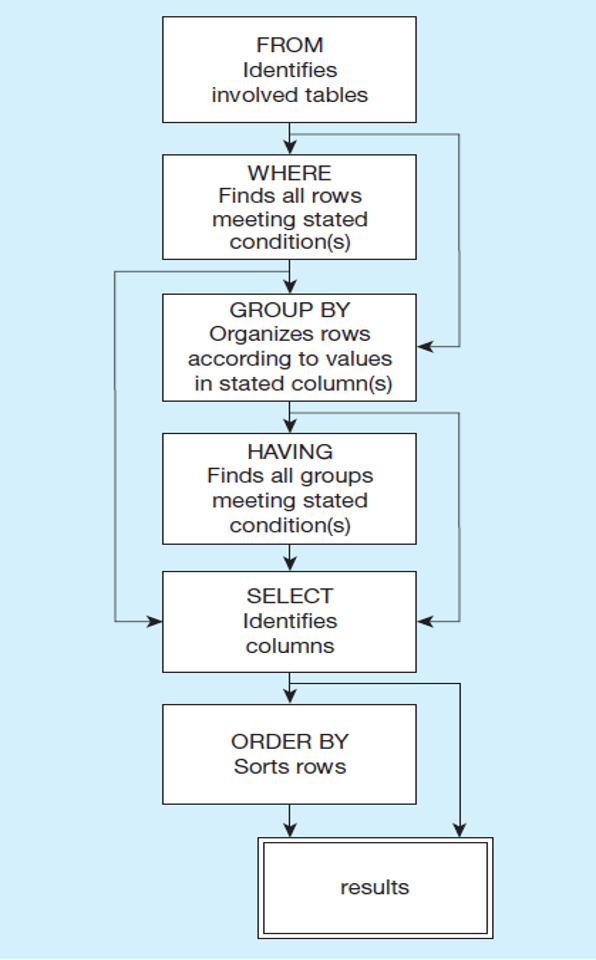

## Part 2: Visualizing Joins

In this part, we'll dive into the concept of joining tables and explore different types of joins using examples.

## Available Tables

Consider the following tables:

### Student table:

| Student_ID | First_name | Last_name | Main_campus | Advisor |
|------------|------------|-----------|------------|---------|
| 1          | ~          | ~         | ~          | ~       |
| 2          | ~          | ~         | ~          | ~       |
| 3          | ~          | ~         | ~          | ~       |
| 4          | ~          | ~         | ~          | ~       |

### Course table:

| Course_ID | Course_name | Classroom | Student_ID |
|-----------|-------------|-----------|------------|
| 1         | ~           | ~         | 1          |
| 2         | ~           | ~         | 1          |
| 3         | ~           | ~         | 2          |
| 4         | ~           | ~         | 3          |

| Course_ID | Course_name | Classroom | Student_ID | Student_ID | First | Last | Main | Advisor |
|-----------|-------------|-----------|------------|------------|-------|------|------|---------|
| 1         | ~           | ~         | 1          |            |       |      |      |         |
| 2         | ~           | ~         | 1          |            |       |      |      |         |
| 3         | ~           | ~         | 2          |            |       |      |      |         |
| 4         | ~           | ~         | 3          |            |       |      |      |         |
| NULL      | NULL        | NULL      | NULL       | 4          | ~     | ~    | ~    | ~       |




## Joins Examples

Let's explore how to use SQL to join tables.

#### 1. Start with a simple query using INNER JOIN:

```sql
SELECT *
FROM student -- main table we want to get data from, known as "Left Table"
INNER JOIN course -- table we want to get additional data from and connect to the Left table, known as "Right Table"
ON student.student_ID = course.student_ID -- how we connect rows between tables
;
```


#### 2. Alternatively, using a WHERE clause to specify the join condition:

```sql 
SELECT *
FROM student
WHERE student.student_ID = course.student_ID -- using a WHERE clause to define the join condition
;
```

#### 3. Refining the query to select specific variables of interest:

```sql 
SELECT first_name, last_name, course_name  <- choose variables of interest
FROM student
INNER JOIN course
ON student.student_ID = course.student_ID
;
```


#### 4. Standard notation for a join query:

```sql 
SELECT colum1, column2, …
FROM [table_of_interest]
_____ [type_of_Join] JOIN [table_we_want_to_connect_with]
ON firsttable.[variable_used_to_connect_in_firsttable] = secondtable.[variable_used_to_connect_in_secondtable]
WHERE condition(s)
ORDER BY vale_to_order_by
;
```

#### 5. Types of Join:

##### a. Inner Join: Only returns connecting matching rows.

```sql 
SELECT student.first_name, student.last_name, course.course_name, course.course_ID
FROM student
INNER JOIN course
ON student.student_ID = course.student_ID
;
```

In our previous example, we are picking information FROM the left table, which is the student table, and matching it to the right table which becomes the course table. This is also valid for the examples below.!

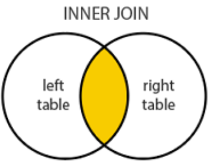

This will only give us all students taking a course with the corresponding course information.

##### b.	Left Join: Return all connected rows + all unconnected rows from Left table (nulls in missing values).

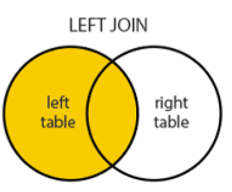

```sql
SELECT student.first_name, student.last_name, course.course_name, course.course_ID
FROM student LEFT JOIN course
ON student.student_ID = course.student_ID
;
```

This will give us all students, regardless of whether they are currently taking a course, AND all students taking a course with the corresponding course information.

##### c.	Right Join: Return all connected rows + all unconnected rows from Right table (nulls in missing values).

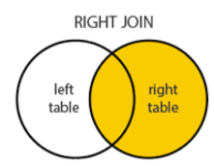

```sql 
SELECT student.first_name, student.last_name, course.course_name, course.course_ID
FROM student
RIGHT JOIN course
ON student.student_ID = course.student_ID
;
```

This will give us all courses, regardless of whether they have students currently taking them, AND all courses with students in them and the corresponding information about those students.

##### d. Full Join: Return all connected rows + all unconnected rows from Both tables (nulls in missing values).


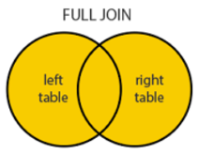

```sql
SELECT student.first_name, student.last_name, course.course_name, course.course_ID
FROM student
FULL JOIN course
ON student.student_ID = course.student_ID
;
```

#### 6. Subqueries:

We can also use the results of a query as the basis for another query.
To exemplify this, we 
1. First need to create a query to identify the data we are interested in, 
2. We need to provide an alias for the results so we can refer to them in the same way we normally refer to a table, and 
3. We need to write the query that will use this results.


Let us start with identifying the courses that student ID 1 has been taking (we will use this new table to match it with the student’s table and get more data on student 1).


```sql
SELECT *
FROM course
WHERE course.student_ID = 1
;
```

This query will give us a table with all the course table’s attributes but only those rows with student ID 1.


| Course_ID  | Course_Name | Classroom | Student_ID | 
|------------|-------------|-----------|------------|
| 1          | ~           | ~         | 1          |
| 2          | ~           | ~         | 2          |


Now we can give this new table an alias so that we can refer to it in other parts of the query:

```sql
(SELECT * FROM course WHERE course.student_ID = 1) AS c ;
```

Or

```sql
(SELECT * FROM course WHERE course.student_ID = 1) AS c ;
```

Finally, we can write another query that will use this table and match it with a different table (namely the student table) and join them so that we get all of the data for student 1 attached to the table above.

```sql
SELECT *
FROM (SELECT * FROM course WHERE course.student_ID = 1) AS c <- we rename this table as c so we just need to write “c” to refer to it
RIGHT JOIN student AS s <- we rename the student table as s so we just need to write “s” to refer to it
ON c.student_ID = s.student_ID <- we match the student_ID in the newly created table, with the student ID in the student table
ORDER BY c.course_ID;
```

| Course_ID  | Course_Name | Classroom | Student_ID | First | Last | Campus | Colleague |
|------------|-------------|-----------|------------|-------|------|--------|-----------|
| 1          | ~           | ~         | 1          |  ~    |  ~   |  ~     |  ~        |
| 2          | ~           | ~         | 2          |  ~    |  ~   |  ~     |  ~        |

#### 7. Self Join

```sql
SELECT *
FROM student As s, student As c 
INNER JOIN course AS c
ON s.student_ID = c.collegue_ID
ORDER BY s.student_ID
;
```

#### 8)	Identify those with Null values (IS NULL):

```sql
SELECT *
FROM student As s
FULL JOIN course AS c
ON s.student_ID = c.student_ID
WHERE s.student_ID IS NULL OR c.student_ID IS NULL ;
```

The table showing from this query will have only results with a NULL student ID in either the student table or the course table.

## PART 3: Getting to Practice

Using the “classic models” database in MySQL, we will create queries to interact with each table individually and with multiple tables at the same time. Please review the following model/schema as a reference for your queries:

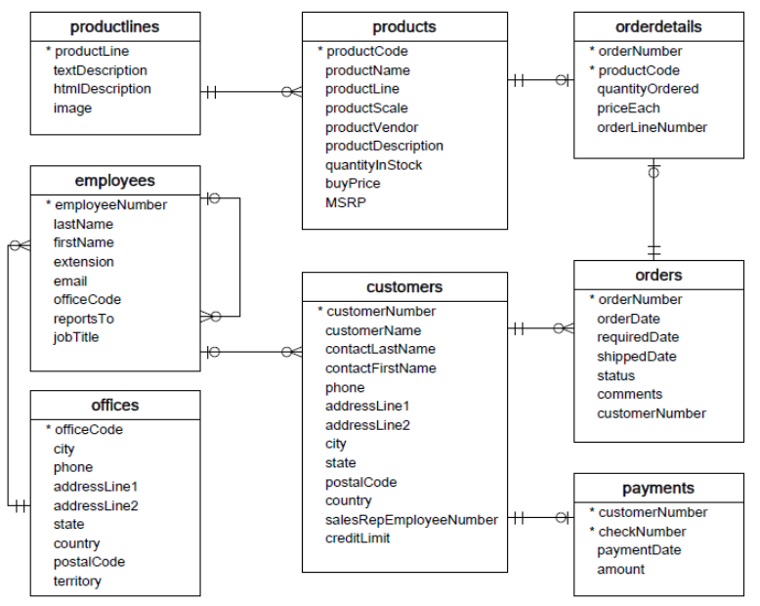

TIPS:

To run queries on the classicmodels database use the following code at the beginning:

  •	USE classicmodels;


##### Typical aggregate functions include:


| Count()    | Max()        | Min()   | Sum()   | Average() |
|------------|--------------|---------|---------|-----------|


## Activity:

##### Ques 1. Create a Query to explore the products available. The output should show all attributes from the products table.

In [8]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))


+------------------------------+----------------+
| CUSTOMERNAME                 | CITY           |
+==============================+================+
| Petit Auto                   | Bruxelles      |
+------------------------------+----------------+
| Mini Classics                | White Plains   |
+------------------------------+----------------+
| Mini Creations Ltd.          | New Bedford    |
+------------------------------+----------------+
| Corporate Gift Ideas Co.     | San Francisco  |
+------------------------------+----------------+
| Down Under Souveniers, Inc   | Auckland       |
+------------------------------+----------------+
| Stylish Desk Decors, Co.     | London         |
+------------------------------+----------------+
| Tekni Collectables Inc.      | Newark         |
+------------------------------+----------------+
| Australian Gift Network, Co  | South Brisbane |
+------------------------------+----------------+
| Suominen Souveniers          | Espoo          |


In [7]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

ORA-00936: missing expression
Help: https://docs.oracle.com/error-help/db/ora-00936/


##### Ques 2. Expanding on the query you created above, limit your output to show the product code, product name, product line, quantity in stock, buy price, and MSRP.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

##### Ques 3. Now let’s rename attributes to make it more understandable. Give an alias of your choice tot the columns in the output from Q2. For example: SKU, Product_Name, Line, Available, Cost, and Suggested_Price.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

##### Ques4. Let’s explore the data through new queries.
              a)Write a query that shows what the average MSRP is.


In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

             b)Write a query that shows what the average MSRP is by product Line.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

            c)Write a query that shows what the average buyPrice is per product Line. Add aliases to the columns to better present the output. 

#### Let’s explore the data through new queries.
   #####                     Q5. Let’s explore the data through new queries.
                   a)Write a query that shows the product name, product buy price, and MSRP and give each column an appropriate alias.


In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

                  b)We will now create a calculated attribute. Using the last code (Q5a) and add a new column with the markup for each product (see the formula below). Give it an appropriate alias.

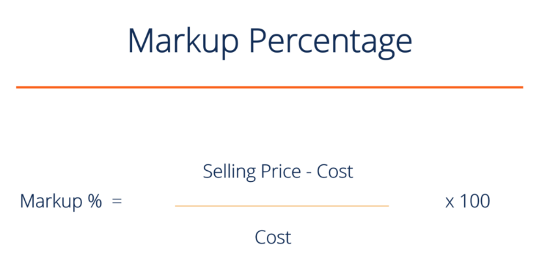

##### NOTE: You can create calculated columns by using parenthesis and typing your formula. Refer to the columns as if they were variables in your formula (that is, selling price would be the MSRP, Cost would be the buyPrice).

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

Now we will create filters based on the calculated fields.

             c)Please add a filter so that we only see products (rows) with an MSRP higher than 100, and a markup higher than 100%. 

##### Note: the alias used for the Markup in the SELECT statement cannot be referenced in the WHERE clause since the WHERE clause runs before the SELECT statement (See page 2 of this file to see the order of operations). Therefore, you will need to repeat the formula for MARKUP in the where clause).

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

## Working with Data in Multiple Tables

#### For the following questions, we will start using different forms of joins. All of the operations and functions we ran in the first 5 questions can be directly applied to queries composed of multiple tables.

#### Ques 6. Let’s compare 2 types of joins (Equi-Join vs Inner Join):
    a) The simplest type of join is an equi-join. Use an equi-join (joining with equality in WHERE clause) to get shared data between the “products” and “productlines” tables. Give an alias to each table so that we can differentiate between them with ease, and keep all columns.


In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

##### NOTE: These 2 tables are connected through the productLine. Note that your output will return 2 copies of the productLine column as a result of the equijoin (1 from each table).

    b) Replicate the join in Q6a using an INNER Join instead of the WHERE clause.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

##### NOTE: These 2 tables are connected through the productLine. Note that your output will return 1 copy of the productLine column since we used an INNER Join rather than an equi-join.


#### Ques 7. Joining 3 or more Tables: It is possible to use these same joins repeatedly to join 3 or more tables. Just keep adding AND functions after the WHERE clause if using an equi-join, or use extra lines with INNER JOIN [next_table] ON [equality]. See example below:


In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

     a)	Use an equi-join to join the data from the tables productLines, products and order details. Display the “textDescription” from the productlines table, the product’s name and MSRP from the products table, and the order Number and quantity ordered from the orderdetails table.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

     b)	Use INNER JOINs to join the data from the tables productLines, products and order details. Display the “textDescription” from the productlines table, the product’s name and MSRP from the products table, and the order Number and quantity ordered from the orderdetails table.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

##### Q8. Outer Joins. Now let’s practicing including all data from one of the tables included in our queries. We will repeat the same query for each situation just altering the type of outer query.

For each of the following lettered subsections, join the customer table with the orders table. Remember to:

•	display all attributes

•	use aliases for the tables.

•	Record from which table each attribute is coming from when specifying how the tables will be joined.

     a)	LEFT OUTER Join.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

    b)   Right Outer Join.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

##### Ques 9. Now we will create a self-join. In our model some employees report to other employees. Create a query that will allow you to see the first and last names of the employees, the employee’s office code, the code of their manager, their manager’s first and last name, and job title.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))

##### Q10. Finally, create a view of the query in Q9 so that we can reuse it later on.

In [ ]:
message = '''

SELECT customername, city FROM Customers


'''

print(query_rds(message))